# Represented population groups

This analysis aimed to answer the following research question:
**Which African population groups are represented in the genetic datasets and what is the distribution of sample sizes within each population group?**

To answer this research question, sample population data from `Data\Processed\Sample_populations.csv` was grouped by ethnolinguistic classification and region. A bar plot was constructed to visualise the sample counts per population group. The regional distribution of samples was visualised using a pie chart.

For this analysis, a sample is defined as an individual from which genomic data was obtained.

## Import libraries and modules

In [4]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Notebooks")

In [5]:
# Import modules and packages

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023"
)
import Utils.constants as constants
import Utils.functions as functions

## Set figure parameters

In [6]:
# Set plot figure area and font size
sns.set(rc={"figure.figsize": (10, 8)})

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.SMALL_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

## Import data

Import data from Data\Processed\Sample_populations.csv.

In [9]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
).drop(columns="Unnamed: 0")

sample_subpopulations.tail(5)

,SUB,SAMPLE_NAME,REG
984,ASW,NA20412,ASW
985,Mandenka,SS6004470,WA
986,MbutiPygmy,SS6004471,CA
987,San,SS6004473,SA
988,Yoruba,SS6004475,WA


## Group data by sample sub-population group

In [20]:
grouped_sample_subpopulations = functions.group_and_count(sample_subpopulations, ["SUB"]).reset_index().rename(columns={"SAMPLE_NAME":"SAMPLE_COUNT"}).drop(columns="REG")
grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(constants.LD_REGIONAL_CLASSIFICATION)
grouped_sample_subpopulations.head(5)

,SUB,SAMPLE_COUNT,REG
0,ACB,114,ACB
1,ASW,71,ASW
2,BantuKenya,12,EA
3,BantuSouthAfrica,8,SA
4,BiakaPygmy,26,CA


## Remove data that is not necessary for this analysis

Remove African American and Caribbean samples

In [21]:
grouped_sample_subpopulations = grouped_sample_subpopulations[~ ((grouped_sample_subpopulations.REG == "ACB") | (grouped_sample_subpopulations.REG == "ASW"))]

## Plot sample sub-population count data

Construct a horizontal barplot of sample counts per subpopulation, colour coded by regional classification

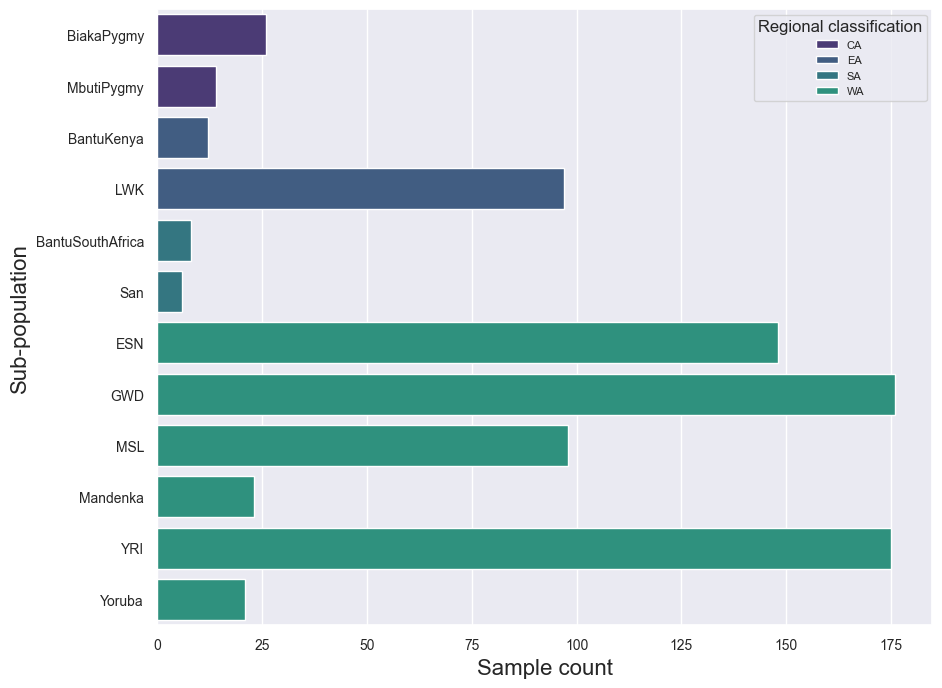

In [23]:
# Define a custom colour palette for plot
custom_palette = sns.color_palette("viridis")

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type = "barplot",
    x="SAMPLE_COUNT",
    y="SUB",
    palette=custom_palette,
    data=grouped_sample_subpopulations.sort_values("REG"),
    xlabel="Sample count",
    ylabel="Sub-population",
    hue="REG",
    order=grouped_sample_subpopulations.sort_values("REG").SUB,
    dodge=False,
    legend_title="Regional classification",
    legend_loc="upper right",
)

plt.savefig("..\Results\Figures\Sample_population_counts.png", dpi=1200)
plt.show()

From the plot above we can see that the individuals from which genomic data was gathered were representative of 12 ethnolinguistic sub-population groups from Western Africa (WA), Southern Africa (SA), Eastern Africa (EA), and Central Africa (CA). The most genomic samples were taken from Yoruban and Gambian (GWD) sub-population groups. 

## Group sample data by regional classification

In [25]:
grouped_regions = grouped_sample_subpopulations.groupby("REG").sum(numeric_only=True).reset_index()
grouped_regions

,REG,SAMPLE_COUNT
0,CA,40
1,EA,109
2,SA,14
3,WA,641


## Plot sample regional classification count data

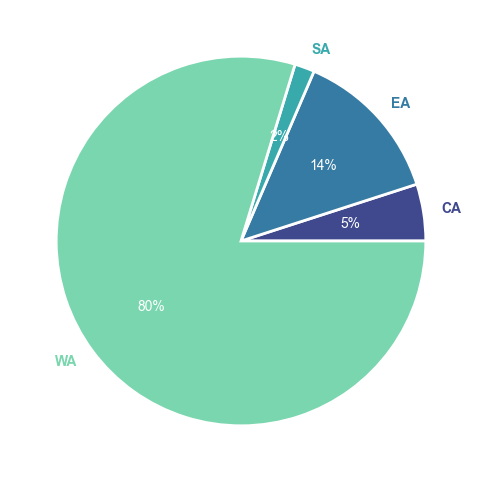

In [27]:
# Create pie chart of sample count per region
color_dict = dict({'SA':'#38AAAC',
                  'EA':'#357BA3',
                  'CA': '#40498E',
                  'WA': '#79D6AE'})

values = grouped_regions.REG.values

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(
    data=grouped_regions,
    x="SAMPLE_COUNT",
    labels=values,
    colors=[color_dict[key] for key in values],
    autopct="%.0f%%",
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.savefig("..\Results\Figures\Sample_region_proportions.png", dpi=1200)
plt.show()

From the plot above, we can see that Southern Africa (SA) was under-represented in the African genomic data. The majority of the individuals from which genomic data was gathered were from Western Africa (WA).